In [1]:
pip install gradio

     -------------------------------------- 14.2/14.2 MB 184.2 kB/s eta 0:00:00
     ------------------------------------ 195.6/195.6 kB 228.0 kB/s eta 0:00:00
     -------------------------------------- 56.2/56.2 kB 195.7 kB/s eta 0:00:00
     ------------------------------------ 143.0/143.0 kB 202.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 71.5/71.5 kB 489.9 kB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 292.3 kB/s eta 0:00:00
     -------------------------------------- 56.9/56.9 kB 213.9 kB/s eta 0:00:00
     ------------------------------------ 319.8/319.8 kB 267.8 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 182.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 84.5/84.5 kB 74.3 kB/s eta 0:00


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import gradio as gr

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import pathlib

data_dir = 'Data'
data_dir = pathlib.Path(data_dir)

Data\ten\13.jpg


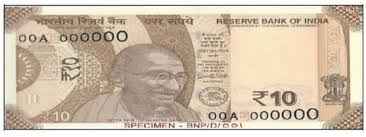

In [6]:
ten = list(data_dir.glob('ten/*'))
print(ten[0])
PIL.Image.open(str(ten[0]))

In [7]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2938 files belonging to 7 classes.
Using 2351 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2938 files belonging to 7 classes.
Using 587 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['fifty', 'fivehundred', 'hundred', 'ten', 'twenty', 'twohundred', 'twothousand']


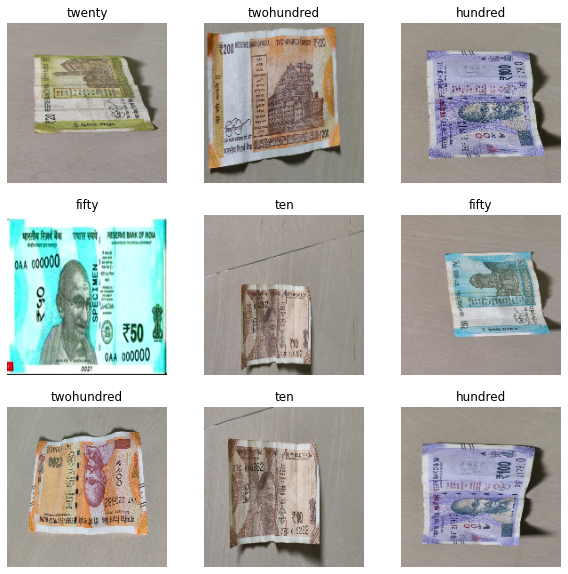

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
num_classes = 7

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


C:\Users\Subash Palvel\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


74/74 [==============================] - 73s 935ms/step - loss: 0.8967 - accuracy: 0.6712 - val_loss: 0.2195 - val_accuracy: 0.9472
Epoch 2/5
74/74 [==============================] - 69s 899ms/step - loss: 0.1081 - accuracy: 0.9779 - val_loss: 0.0318 - val_accuracy: 0.9932
Epoch 3/5
74/74 [==============================] - 67s 878ms/step - loss: 0.0283 - accuracy: 0.9949 - val_loss: 0.0215 - val_accuracy: 0.9949
Epoch 4/5
74/74 [==============================] - 67s 880ms/step - loss: 0.0369 - accuracy: 0.9911 - val_loss: 0.2776 - val_accuracy: 0.9114
Epoch 5/5
74/74 [==============================] - 67s 874ms/step - loss: 0.0530 - accuracy: 0.9855 - val_loss: 0.0221 - val_accuracy: 0.9966


In [14]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(7)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=7)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

C:\Users\Subash Palvel\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Subash Palvel\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Subash Palvel\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Subash Palvel\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 63ms/step
